In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Load data
df = pd.read_csv('./samsungelec.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-04,1432000.0,1434000.0,1420000.0,1430000.0,1330524.375,190098
1,2012-12-05,1430000.0,1455000.0,1427000.0,1455000.0,1353785.375,248728
2,2012-12-06,1468000.0,1471000.0,1434000.0,1454000.0,1352855.000,284974
3,2012-12-07,1450000.0,1498000.0,1450000.0,1480000.0,1377046.375,317649
4,2012-12-10,1506000.0,1506000.0,1485000.0,1491000.0,1387281.000,261122


In [3]:
# Unix-time to 
df.Timestamp = pd.to_datetime(df.Date)

# Resampling to daily frequency
df.index = df.Timestamp
df = df.resample('D').mean()

df_week = df.resample('W').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

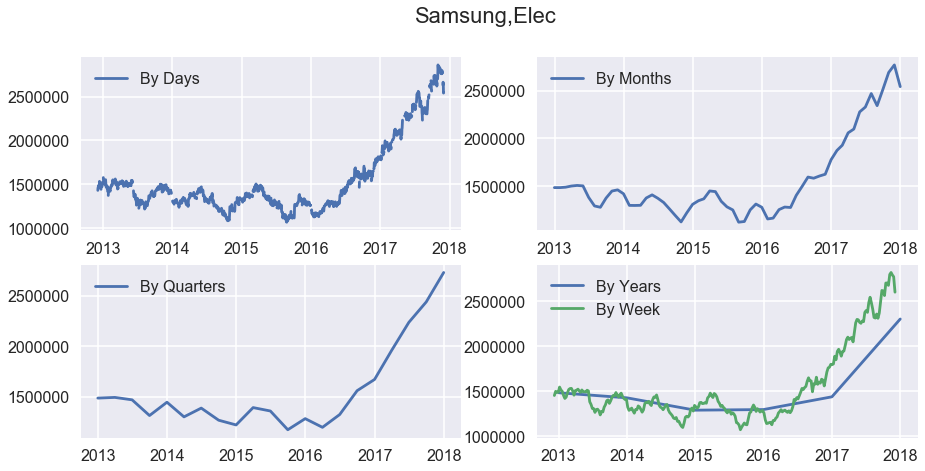

In [4]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Samsung,Elec', fontsize=22)

plt.subplot(221)
plt.plot(df.Close, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Close, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Close, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Close, '-', label='By Years')
plt.legend()


plt.plot(df_week.Close, '-', label='By Week')
plt.legend()
# plt.tight_layout()
plt.show()

Dickey–Fuller test: p=0.990576


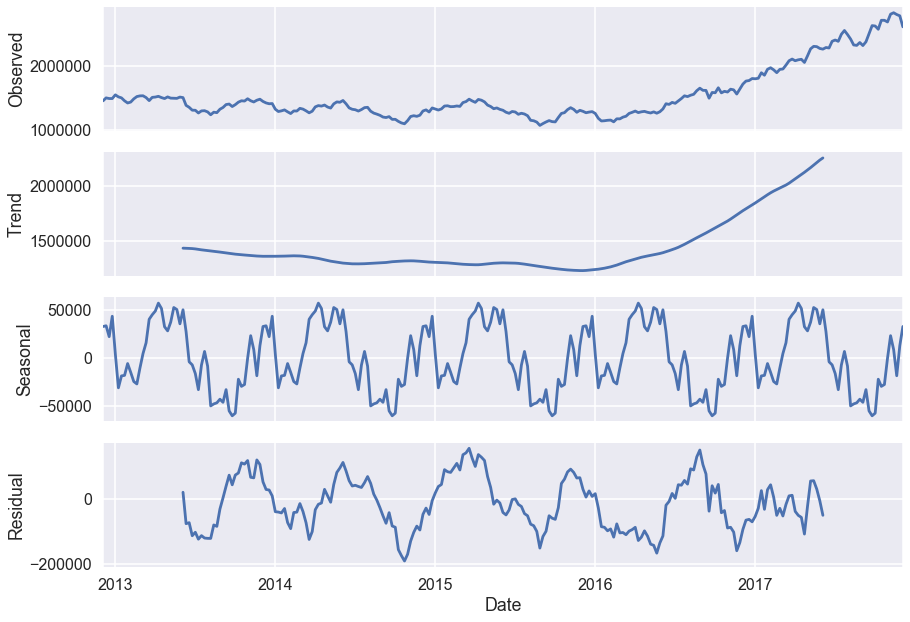

Date
2012-12-09    1454750.0
2012-12-16    1501000.0
2012-12-23    1490750.0
2012-12-30    1490500.0
2013-01-06    1548000.0
2013-01-13    1516600.0
2013-01-20    1501000.0
2013-01-27    1455400.0
2013-02-03    1422000.0
2013-02-10    1436200.0
2013-02-17    1485750.0
2013-02-24    1521400.0
2013-03-03    1532000.0
2013-03-10    1533600.0
2013-03-17    1505800.0
2013-03-24    1458400.0
2013-03-31    1509000.0
2013-04-07    1513800.0
2013-04-14    1525200.0
2013-04-21    1505400.0
2013-04-28    1490400.0
2013-05-05    1516000.0
2013-05-12    1497200.0
2013-05-19    1496250.0
2013-05-26    1493600.0
2013-06-02    1513400.0
2013-06-09    1505000.0
2013-06-16    1385000.0
2013-06-23    1355200.0
2013-06-30    1310400.0
                ...    
2017-05-14    2299250.0
2017-05-21    2294800.0
2017-05-28    2266600.0
2017-06-04    2256000.0
2017-06-11    2281250.0
2017-06-18    2274000.0
2017-06-25    2377600.0
2017-07-02    2397600.0
2017-07-09    2377200.0
2017-07-16    2485800.0
2017-07-23 

In [34]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_week.Close).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_week.Close)[1])
plt.show()
print(df_week.Close)

In [37]:
df_week['prices_box_diff'] = df_week.Close - df_week.Close.shift(12)

print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_week.prices_box_diff[12:])[1])
print(df_week['prices_box_diff'])

Dickey–Fuller test: p=0.173805
Date
2012-12-09         NaN
2012-12-16         NaN
2012-12-23         NaN
2012-12-30         NaN
2013-01-06         NaN
2013-01-13         NaN
2013-01-20         NaN
2013-01-27         NaN
2013-02-03         NaN
2013-02-10         NaN
2013-02-17         NaN
2013-02-24         NaN
2013-03-03     77250.0
2013-03-10     32600.0
2013-03-17     15050.0
2013-03-24    -32100.0
2013-03-31    -39000.0
2013-04-07     -2800.0
2013-04-14     24200.0
2013-04-21     50000.0
2013-04-28     68400.0
2013-05-05     79800.0
2013-05-12     11450.0
2013-05-19    -25150.0
2013-05-26    -38400.0
2013-06-02    -20200.0
2013-06-09      -800.0
2013-06-16    -73400.0
2013-06-23   -153800.0
2013-06-30   -203400.0
                ...   
2017-05-14    407850.0
2017-05-21    351800.0
2017-05-28    318600.0
2017-06-04    247400.0
2017-06-11    205250.0
2017-06-18    171800.0
2017-06-25    301200.0
2017-07-02    306600.0
2017-07-09    278400.0
2017-07-16    435800.0
2017-07-23    393000.

Dickey–Fuller test: p=0.000000


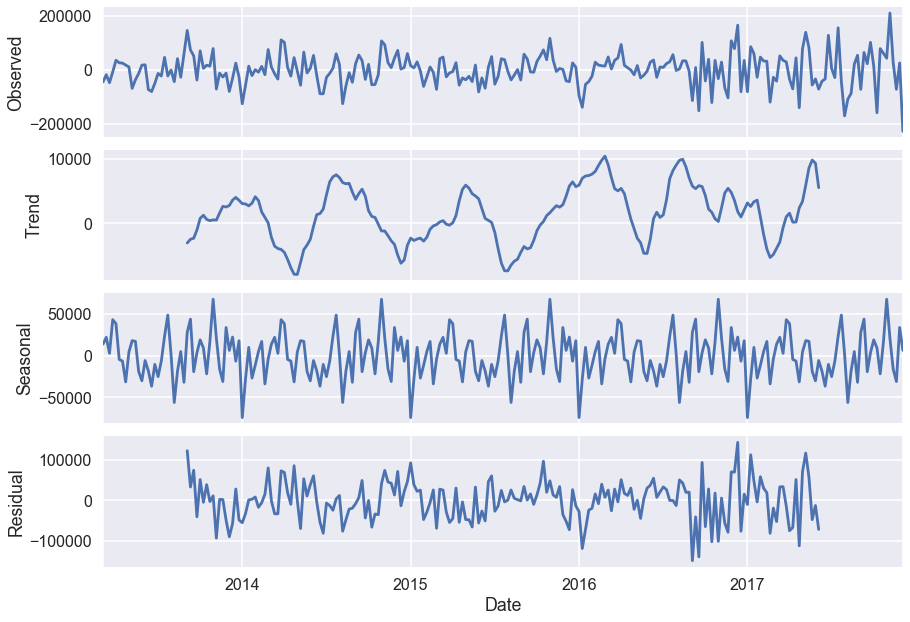

Date
2012-12-09         NaN
2012-12-16         NaN
2012-12-23         NaN
2012-12-30         NaN
2013-01-06         NaN
2013-01-13         NaN
2013-01-20         NaN
2013-01-27         NaN
2013-02-03         NaN
2013-02-10         NaN
2013-02-17         NaN
2013-02-24         NaN
2013-03-03         NaN
2013-03-10    -44650.0
2013-03-17    -17550.0
2013-03-24    -47150.0
2013-03-31     -6900.0
2013-04-07     36200.0
2013-04-14     27000.0
2013-04-21     25800.0
2013-04-28     18400.0
2013-05-05     11400.0
2013-05-12    -68350.0
2013-05-19    -36600.0
2013-05-26    -13250.0
2013-06-02     18200.0
2013-06-09     19400.0
2013-06-16    -72600.0
2013-06-23    -80400.0
2013-06-30    -49600.0
                ...   
2017-05-14     82750.0
2017-05-21    -56050.0
2017-05-28    -33200.0
2017-06-04    -71200.0
2017-06-11    -42150.0
2017-06-18    -33450.0
2017-06-25    129400.0
2017-07-02      5400.0
2017-07-09    -28200.0
2017-07-16    157400.0
2017-07-23    -42800.0
2017-07-30   -170900.0
2017-0

In [39]:
# Regular differentiation
df_week['prices_box_diff2'] = df_week.prices_box_diff - df_week.prices_box_diff.shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(df_week.prices_box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_week.prices_box_diff2[13:])[1])



plt.show()

print(df_week['prices_box_diff2'])



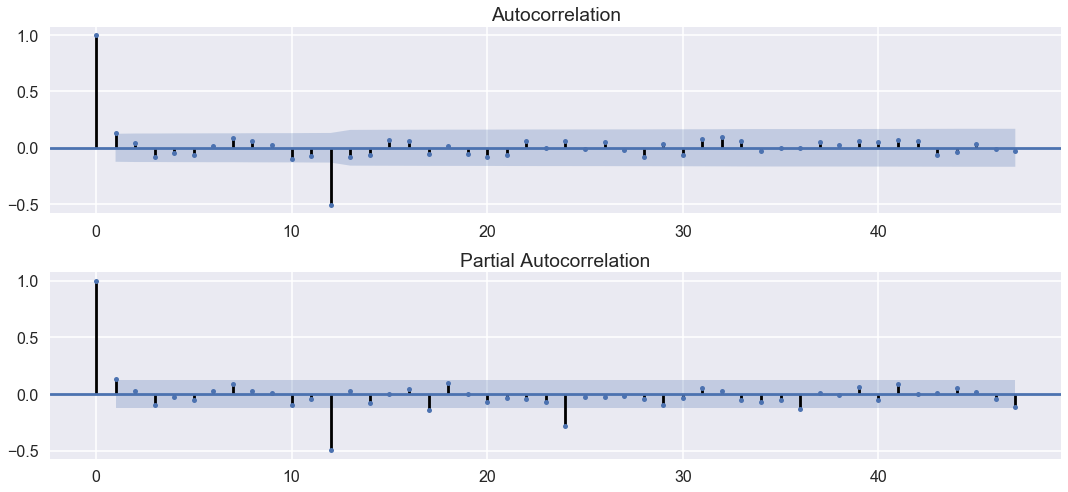

In [40]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)

sm.graphics.tsa.plot_acf(df_week.prices_box_diff2[13:].values.squeeze(), lags=47, ax=ax)

ax = plt.subplot(212)

sm.graphics.tsa.plot_pacf(df_week.prices_box_diff2[13:].values.squeeze(), lags=47, ax=ax)


plt.tight_layout()
plt.show()

In [41]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 6)
Ps = range(0, 3)
ps = range(0, 6)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_week.Close, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

wrong parameters: (0, 0, 0, 0)
wrong parameters: (2, 1, 0, 0)
wrong parameters: (2, 1, 0, 1)
wrong parameters: (2, 1, 1, 0)
wrong parameters: (2, 1, 1, 1)
wrong parameters: (2, 1, 2, 0)
wrong parameters: (2, 1, 2, 1)
wrong parameters: (2, 4, 0, 0)
wrong parameters: (2, 4, 0, 1)
wrong parameters: (2, 4, 1, 0)
wrong parameters: (2, 4, 1, 1)


LinAlgError: Singular matrix

In [42]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters          aic
2   (0, 0, 1, 1)  6121.127071
38  (1, 0, 1, 1)  6123.391195
8   (0, 1, 1, 1)  6124.026378
4   (0, 0, 2, 1)  6124.160288
40  (1, 0, 2, 1)  6124.953946
                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                  261
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood               -3057.564
Date:                            Tue, 05 Dec 2017   AIC                           6121.127
Time:                                    11:34:11   BIC                           6131.821
Sample:                                12-09-2012   HQIC                          6125.426
                                     - 12-03-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------

Dickey–Fuller test:: p=0.000000


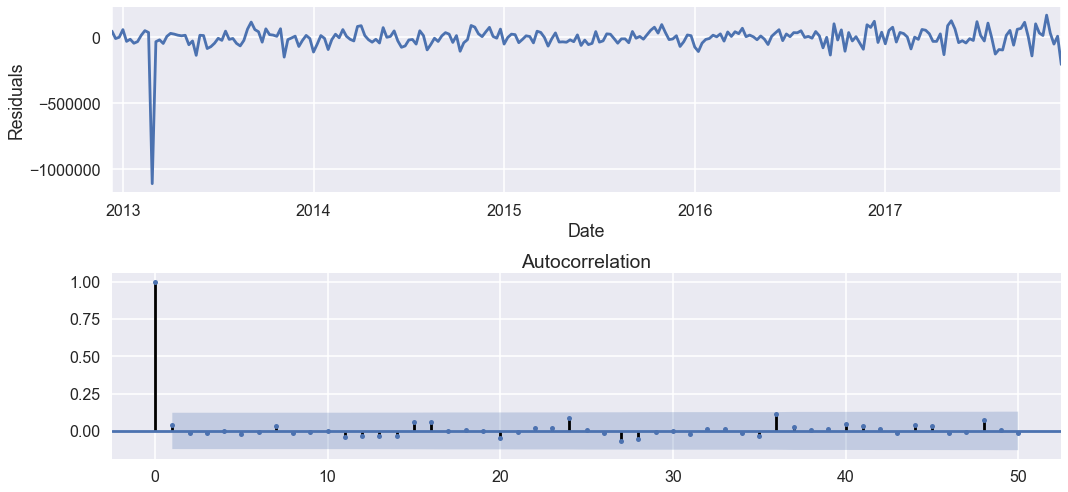

In [43]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[1:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[1:].values.squeeze(), lags=50, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[1:])[1])

plt.tight_layout()
plt.show()

                  0
count  2.610000e+02
mean  -4.457853e+02
std    1.253184e+05
min   -1.107088e+06
25%   -3.393280e+04
50%    4.848434e+02
75%    3.215804e+04
max    1.454750e+06


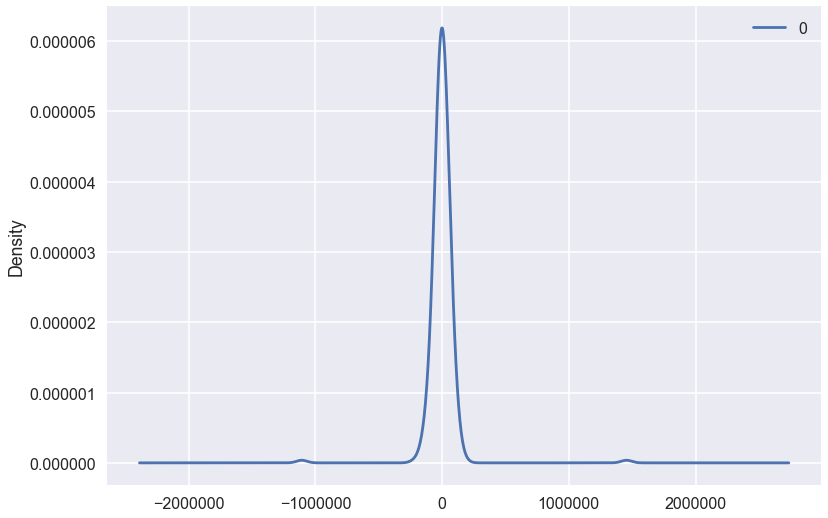

In [44]:
from pandas import DataFrame

residuals = DataFrame(best_model.resid)
residuals.plot(kind='kde')
print(residuals.describe())
plt.show()

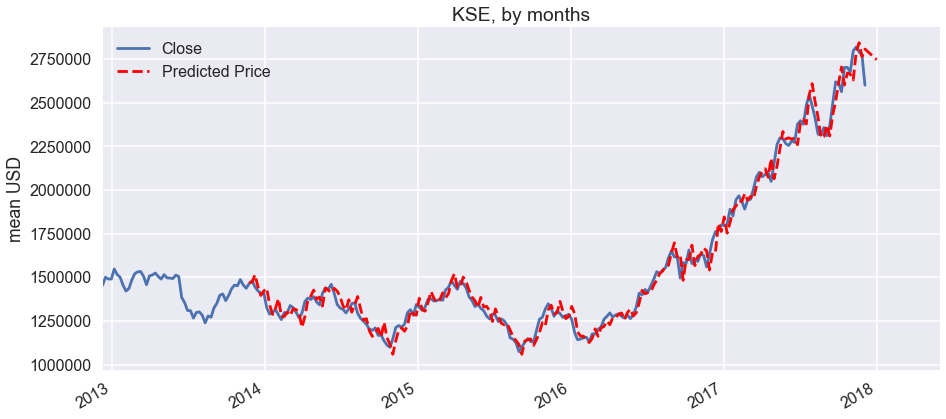

In [46]:
# Prediction
df_month2 = df_week[['Close']]
date_list = [ datetime(2017, 12, 31),
             datetime(2018, 1, 1),
             datetime(2018, 1, 10),
             datetime(2018, 1, 20),
             datetime(2018, 1, 31),
                 datetime(2018, 2, 28),
             datetime(2018, 3, 31),
             datetime(2018, 4, 30),
             datetime(2018, 5, 30)                          
            ]
future = pd.DataFrame(index=date_list, columns= df_week.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=50, end=500)
plt.figure(figsize=(15,7))
df_month2.Close.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Price')
plt.legend()
plt.title('KSE, by months')
plt.ylabel('mean USD')
plt.show()